<a href="https://colab.research.google.com/github/mutsh/Machine-Learning-AI-Models/blob/main/K-means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# K-means clustering
Load in the Boston Housing dataset to perform kmeans clustering and Visualize your results with PCA to check the number of clusters.

Then, establish the optimal number of clusters for the data set by using the elbow and silhouette methods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#@title Load the file from github instead

link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/boston.csv"
db_df = pd.read_csv(link_to_file)
print(db_df.shape)
db_df.head()

(506, 7)


,crim,zn,indus,nox,rm,dis,medv
0,0.00632,18.0,2.31,0.538,6.575,4.0900,24.0
1,0.02731,0.0,7.07,0.469,6.421,4.9671,21.6
2,0.02729,0.0,7.07,0.469,7.185,4.9671,34.7
3,0.03237,0.0,2.18,0.458,6.998,6.0622,33.4
4,0.06905,0.0,2.18,0.458,7.147,6.0622,36.2


In [3]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()

In [4]:
numeric = db_df.select_dtypes(include='number')
# Step 1: Select the desired numeric columns
numeric = db_df[['crim', 'zn', 'indus', 'nox', 'rm','dis','medv']]

# Step 2: Convert to numpy array (optional, but required by StandardScaler)
numeric_array = numeric.to_numpy()

# Step 3: Scale the data
scaling = StandardScaler()
db_scale = scaling.fit_transform(numeric_array)

# Result
db_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.41367189,
         0.1402136 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.19427445,
         0.55715988, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  1.28271368,
         0.55715988,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.98496002,
        -0.77368357,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.72567214,
        -0.66843684, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.36276709,
        -0.61324648, -1.15724782]])

In [5]:
from sklearn.cluster import KMeans

#init a kmeans object with 3 clusters and 10 different, random initalizations
#We will set the random_state so we always get the same result for teaching purposes
kmeans_obj = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [6]:
#perform kmeans clustering on the data
kmeans_obj.fit(db_scale)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [7]:
vars(kmeans_obj)

{'n_clusters': 3,
 'init': 'random',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': 42,
 'copy_x': True,
 'algorithm': 'lloyd',
 'n_features_in_': 7,
 '_tol': np.float64(0.00010000000000000005),
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 1,
 'cluster_centers_': array([[ 0.70934512, -0.48772236,  1.17850039,  1.09950465, -0.47923904,
         -0.85843727, -0.73178657],
        [-0.35916685, -0.36229363, -0.43565427, -0.35340279,  0.12613033,
          0.02028637,  0.28766352],
        [-0.41220896,  1.71114682, -1.06228059, -1.1153926 ,  0.55156158,
          1.46989983,  0.61944155]]),
 '_n_features_out': 3,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
# fit a PCA object with 4 PCs on the data we put into the kmeans clustering
from sklearn.decomposition import PCA
#Init a PCA object
#We'll use the first 4 PCs.
PCA_obj = PCA(n_components = 4)

In [9]:
PCA_obj

PCA(n_components=4)

In [10]:
transformed = PCA_obj.fit_transform(db_scale)

In [11]:
transformed

array([[-1.10315518,  0.07624496, -0.12031069, -0.24738687],
       [-0.78806436, -0.28543689, -0.54381769, -0.73032261],
       [-1.60622953,  1.20737086, -0.26604306, -0.77253587],
       ...,
       [ 0.16391435,  1.19854981, -0.37203507, -0.12613195],
       [ 0.2699998 ,  0.87411695, -0.42564685, -0.11472306],
       [ 0.94918543, -0.45598207, -0.70390608, -0.06490086]])

In [12]:
pca_df = pd.DataFrame(transformed, columns= ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df

,PC1,PC2,PC3,PC4
0,-1.103155,0.076245,-0.120311,-0.247387
1,-0.788064,-0.285437,-0.543818,-0.730323
2,-1.606230,1.207371,-0.266043,-0.772536
3,-2.057468,0.635612,-0.304414,-1.086490
4,-2.225084,0.941603,-0.246468,-1.096145
...,...,...,...,...
501,0.319975,0.701447,-0.497977,-0.095976
502,0.624916,0.204742,-0.673454,-0.063430
503,0.163914,1.198550,-0.372035,-0.126132
504,0.270000,0.874117,-0.425647,-0.114723


<Axes: xlabel='PC1', ylabel='PC2'>

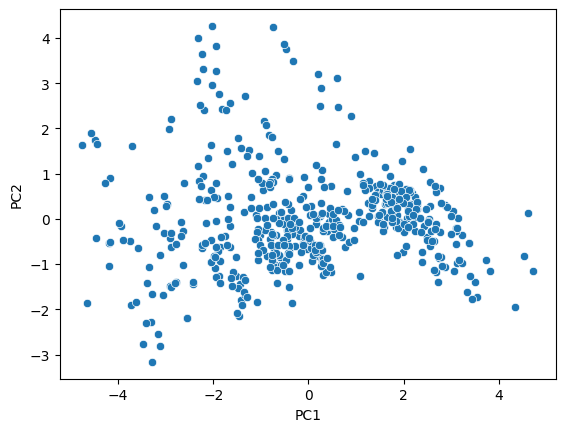

In [13]:
sns.scatterplot(pca_df, x = 'PC1', y = 'PC2')

In [14]:
pca_df['cluster'] = kmeans_obj.labels_

In [15]:
pca_df.head()

,PC1,PC2,PC3,PC4,cluster
0,-1.103155,0.076245,-0.120311,-0.247387,1
1,-0.788064,-0.285437,-0.543818,-0.730323,1
2,-1.606230,1.207371,-0.266043,-0.772536,1
3,-2.057468,0.635612,-0.304414,-1.086490,1
4,-2.225084,0.941603,-0.246468,-1.096145,1


<Axes: xlabel='PC1', ylabel='PC2'>

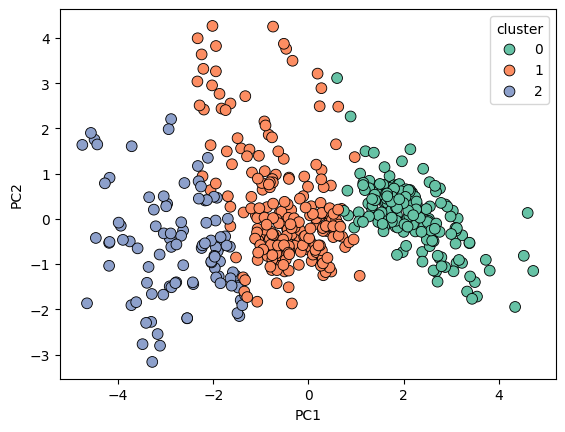

In [16]:
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='Set2',
    s=60,
    edgecolor='black'
)

In [17]:
kmeans_obj.cluster_centers_

array([[ 0.70934512, -0.48772236,  1.17850039,  1.09950465, -0.47923904,
        -0.85843727, -0.73178657],
       [-0.35916685, -0.36229363, -0.43565427, -0.35340279,  0.12613033,
         0.02028637,  0.28766352],
       [-0.41220896,  1.71114682, -1.06228059, -1.1153926 ,  0.55156158,
         1.46989983,  0.61944155]])

In [18]:
pca_centers = PCA_obj.transform(kmeans_obj.cluster_centers_)
pca_centers

array([[ 2.15446468,  0.08420259,  0.26674266,  0.32763786],
       [-0.46656033,  0.19527333, -0.46085255, -0.4413939 ],
       [-2.71504365, -0.6064532 ,  0.60846289,  0.45521978]])

In [19]:
pca_centers = pd.DataFrame(pca_centers, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [20]:
pca_centers

,PC1,PC2,PC3,PC4
0,2.154465,0.084203,0.266743,0.327638
1,-0.466560,0.195273,-0.460853,-0.441394
2,-2.715044,-0.606453,0.608463,0.455220


<Axes: xlabel='PC1', ylabel='PC2'>

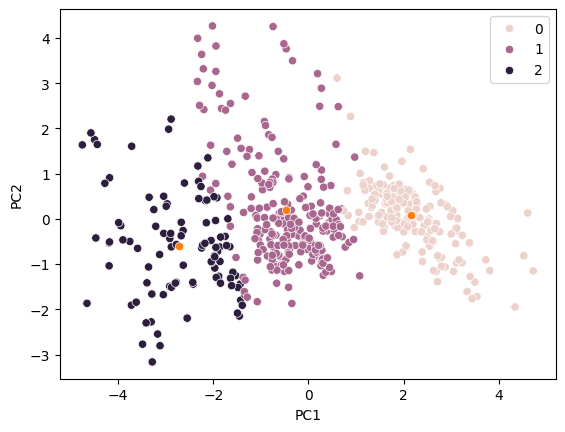

In [21]:
sns.scatterplot(pca_df, x = 'PC1', y = 'PC2', hue = 'cluster')
sns.scatterplot(pca_centers, x = 'PC1', y = 'PC2')

Finding the optimal number of clusters using Elbow and Silhouette coefficient

In [22]:
sses = []
#Testing between 1 and 11 clusters.
for k in range(1, 11):
    #Use the same intialization parameters as before, except the number of clusters
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(db_scale)
    sses.append(kmeans.inertia_)

In [23]:
sses

[3541.9999999999977,
 2226.5287005522787,
 1714.8859764628069,
 1385.207392247789,
 1148.0285241768365,
 1032.866549861133,
 926.1333623339933,
 856.1150052172758,
 787.4998151982193,
 733.1653106441995]

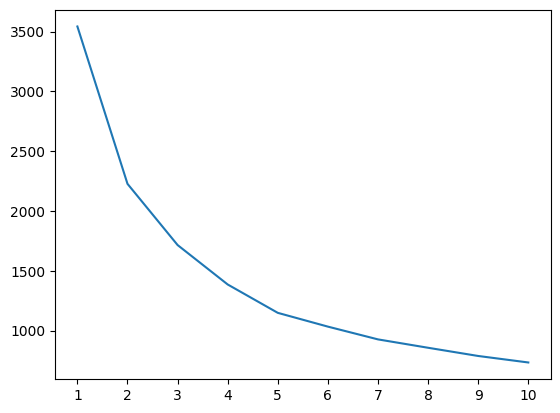

In [24]:
sns.lineplot(x = range(1,11), y = sses)
plt.xticks(range(1, 11))
plt.show()

In [25]:
#The challenge with this method is that you need to know how to spell 'silhouette'.
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice that this time we start at 2 clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(db_scale)
    score = silhouette_score(db_scale, kmeans.labels_)
    silhouette_coefficients.append(score)

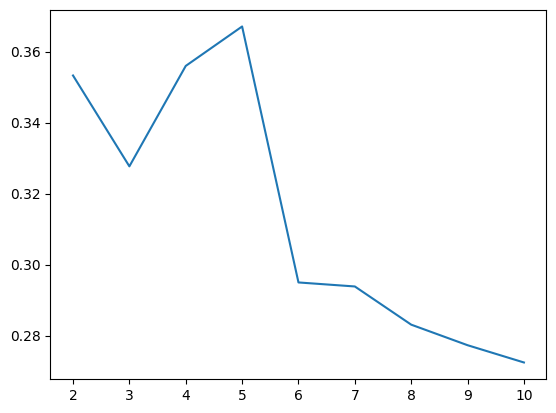

In [26]:
sns.lineplot(x = range(2,11), y = silhouette_coefficients)
plt.xticks(range(2, 11))
plt.show()